# **CHALLENGE 1 : SKEWNESS**

In [ ]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# **1. Definition**

 Skewness is a measure of the asymmetry of the distribution of a real-valued random variable about its mean quantification is defined mathamtically by third standardized moment

### Skewness = 𝐸[(𝑋−𝜇)^3] / (𝜎^3)

 where 𝑋 is the random variable 𝜇 is the mean of 𝑋 and 𝜎 is the standard deviation of 𝑋

**References**

1. https://www.investopedia.com/terms/s/skewness.asp

# **2.Description**

As stated above skewness is a statistical measure that quantifies the degree of asymmetry in a distribution relative to the mean
Positive skewness indicates a distribution with a longer tail on the right suggesting a concentration of data points below the mean where negative skewness shows a longer tail on the left indicating a concentration above the mean
This measure helps in understanding the tail behavior of the distribution which is crucial for risk assessment in financial analyses and predictive modeling

**References**
1. https://en.wikipedia.org/wiki/Skewness
2. https://koshurai.medium.com/understanding-skewness-a-statistical-concept-with-real-world-applications-bfb64c2e4c36



 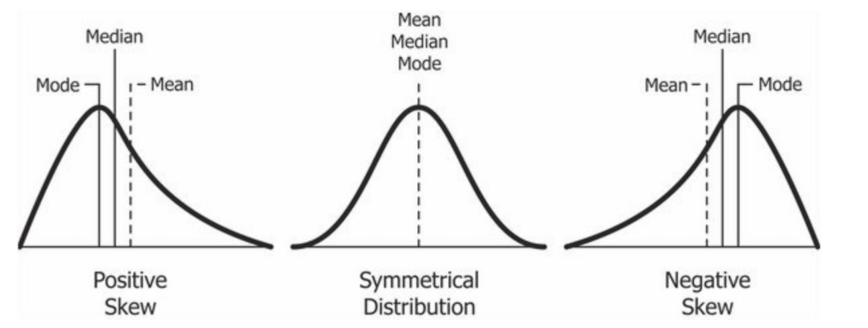

 Fig 1: Skewness visualization

# **3. Demonstration**

In this to numaricaly represent the data we have taken help from loan data from the below mentioned source. we have considered 3 features from that real world data which represents normal and positively skewed data and we have also simulated one negatively skewed data to complete our understanding.

We have computed data summary to establish that skewness exists.

### **Features Explaination**

### 1. simulated_negative_skewness
We are simulationg negative skewed distribution of same size from exponential function

### 2. log.annual.inc
The natural logarithm of the borrower's self-reported annual income Employing the logarithm reduces income distribution skewness facilitating better modeling

### 3. days.with.cr.line
The number of days the borrower has had a credit line where longer histories might imply more financial reliability

### 4. inq.last.6mths
The count of credit inquiries in the last six months where more inquiries can suggest increased creditseeking behavior and potential risk

**References**
1. https://www.kaggle.com/code/matinmahmoudi/loan-eda-project-quick-start-for-beginners/input

In [4]:
def negative_skew_data(size=9578, skewness=1):
  data = np.random.exponential(scale=skewness, size=size)
  data_neg_skew = -data + max(data) + 1
  return pd.Series(data_neg_skew)

simulated_negative_skewness = negative_skew_data(size=9578, skewness=1)

df = pd.read_csv('loan_data.csv')
df = df[['log.annual.inc', 'days.with.cr.line', 'inq.last.6mths']]
df.insert(0, 'simulated_negative_skewness', simulated_negative_skewness)
display(df.head())

,simulated_negative_skewness,log.annual.inc,days.with.cr.line,inq.last.6mths
0,8.795439,11.350407,5639.958333,0
1,8.744494,11.082143,2760.000000,0
2,8.450934,10.373491,4710.000000,1
3,9.295393,11.350407,2699.958333,1
4,8.142150,11.299732,4066.000000,0


In [5]:
display(df.describe())

,simulated_negative_skewness,log.annual.inc,days.with.cr.line,inq.last.6mths
count,9578.000000,9578.000000,9578.000000,9578.000000
mean,8.592334,10.932117,4560.767197,1.577469
std,1.004098,0.614813,2496.930377,2.200245
min,1.000000,7.547502,178.958333,0.000000
25%,8.207291,10.558414,2820.000000,0.000000
50%,8.896844,10.928884,4139.958333,1.000000
75%,9.299262,11.291293,5730.000000,2.000000
max,9.595498,14.528354,17639.958330,33.000000


We can clearely observe the difference between mean and median and also difference between different quartiles to estimate that simulated_negative_skewness seems negatively skewed then log.annual.inc	seems normal whereas days.with.cr.line & inq.last.6mths seems positivly skewed

# **4. Diagram**

We can visualize this distribution to better understand its skewness

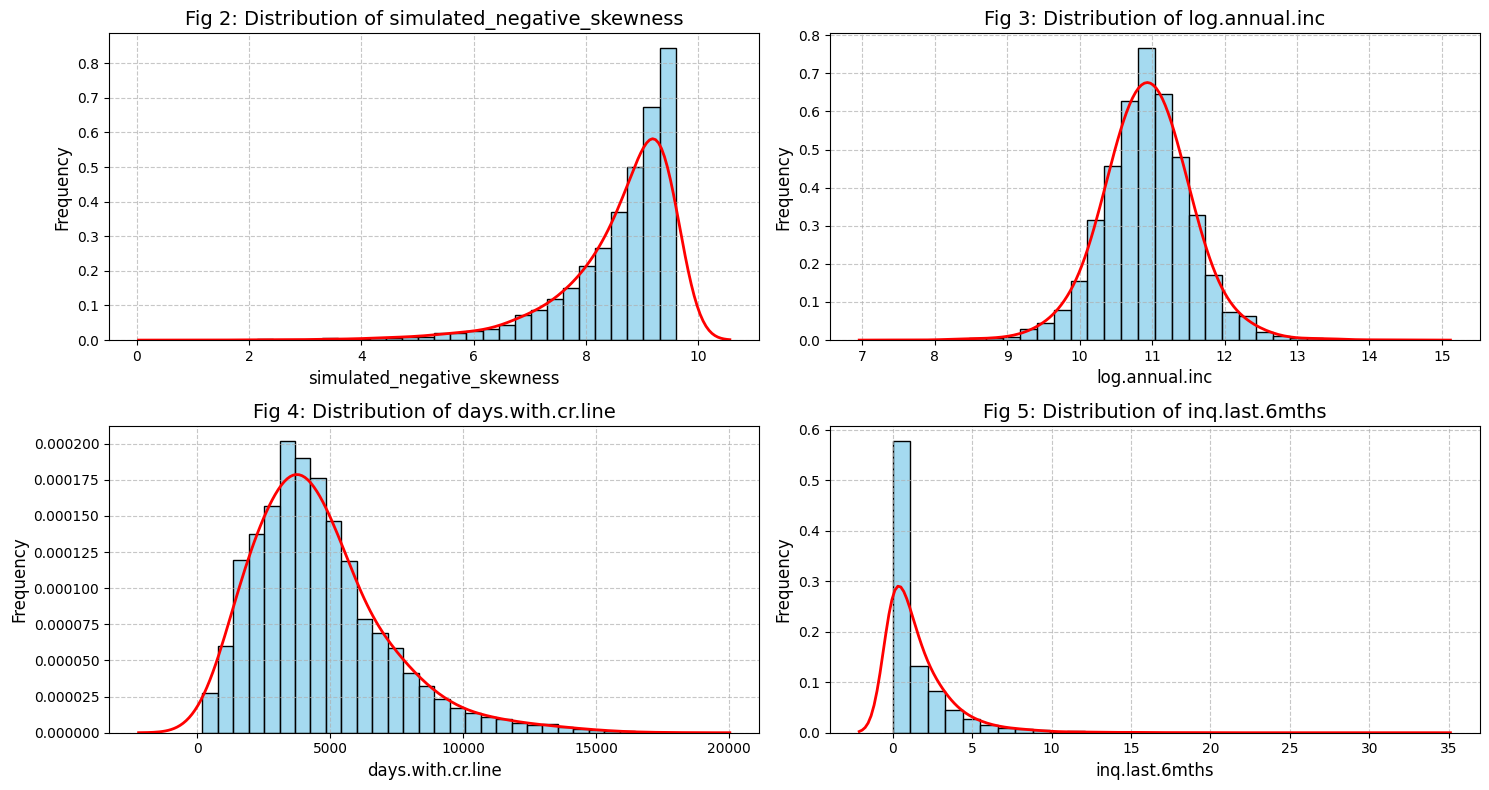

In [6]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(df.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=30, color='skyblue', stat='density')
    sns.kdeplot(df[feature], color='red', linewidth=2, bw_adjust=2)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Fig {i+2}: Distribution of {feature}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can now visually confirm that simulated_negative_skewness seems negatively skewed then log.annual.inc	seems normal whereas days.with.cr.line & inq.last.6mths seems positivly skewed

# **5. Diagnosis**

To recognise that the problem exists we can compute mean and median to take a directional estimate, then we can numarically test the skewness by using third standerdize moment formula

#### Skewness = 𝐸[(𝑋−𝜇)^3] / (𝜎^3)

where 𝑋 is the random variable 𝜇 is the mean of 𝑋 and 𝜎 is the standard deviation of 𝑋

In [7]:
feature_summaries = []

for feature in df.columns:
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()
    n = len(df[feature])
    skewness_val = (np.sum((df[feature] - mean_val)**3) / n) / (std_val**3)
    skewness_observation = ""
    if skewness_val > 1:
        skewness_observation = "The feature appears to be positively skewed, indicating a few exceptionally high values."
    elif skewness_val < -1:
        skewness_observation = "The feature appears to be negatively skewed, indicating a few exceptionally low values."
    else:
        skewness_observation = "The feature appears to be relatively symmetrical."
    summary = f"""
    Feature: {feature}
    Mean: {mean_val:.2f}
    Median: {median_val:.2f}
    Standard Deviation: {std_val:.2f}
    Skewness: {skewness_val:.2f}
    Skewness Observation: {skewness_observation}
    """
    feature_summaries.append(summary)
for summary in feature_summaries:
    print(summary)
    print("-" * 30)


    Feature: simulated_negative_skewness
    Mean: 8.59
    Median: 8.90
    Standard Deviation: 1.00
    Skewness: -2.01
    Skewness Observation: The feature appears to be negatively skewed, indicating a few exceptionally low values.
    
------------------------------

    Feature: log.annual.inc
    Mean: 10.93
    Median: 10.93
    Standard Deviation: 0.61
    Skewness: 0.03
    Skewness Observation: The feature appears to be relatively symmetrical.
    
------------------------------

    Feature: days.with.cr.line
    Mean: 4560.77
    Median: 4139.96
    Standard Deviation: 2496.93
    Skewness: 1.16
    Skewness Observation: The feature appears to be positively skewed, indicating a few exceptionally high values.
    
------------------------------

    Feature: inq.last.6mths
    Mean: 1.58
    Median: 1.00
    Standard Deviation: 2.20
    Skewness: 3.58
    Skewness Observation: The feature appears to be positively skewed, indicating a few exceptionally high values.
    
---

This skewness value represents numarically that the problem exists and also measures the scale of the problem as we can observe that skewness for feature inq.last.6mths is 3.58 whereas for days.with.cr.line is 1.16 that shows both are positively skewed but the feature inq.last.6mths is more skewed can be obsereved from the skewness value.

# **6.Damage**

Skewness in data, if not addressed, can cause significant problems in statistical analysis and predictive modeling:

### 1. Misleading Descriptive Statistics
Skewness pulls the mean away from the central location leading to misrepresentations in data analysis The mean being sensitive to outliers in skewed distributions does not accurately reflect the typical value which can mislead decisions based on this metric

### 2. Poor Model Performance
Many models especially parametric ones assume that the data are normally distributed Skewness violates this assumption leading to models that are inefficient and have poor predictive performance This is particularly critical in fields like finance and healthcare where prediction accuracy can have substantial implications

### 3. Inaccurate Inference
Statistical tests that assume normality such as t-tests and ANOVA become less reliable under skewness The p-values from these tests can be misleading leading to incorrect conclusions about the significance of effects or associations

### 4. Compromised Risk Assessment
In financial data skewness can lead to underestimation of risk (for positive skewness) or overestimation (for negative skewness) This can affect portfolio management pricing strategies and risk management protocols

# **7. Direction**

Dealing with skewness in data involves several techniques that can help transform skewed data into a more normally distributed form making it suitable for various statistical analyses that assume normality Here are some of the primary methods used to address skewness

### 1. Data Transformation
Transformations can reduce or eliminate skewness These methods adjust the scale of the data and can be particularly effective for moderate to highly skewed data

*   Log Transformation
Works well for reducing right skewness (positive skewness) in data Its useful when data include exponential growth high range values or several orders of magnitude
*   Square Root Transformation
This is less strong than a log transformation and is useful for moderate skewness It is especially effective for count data
*   Inverse Transformation
Useful for heavy right skewed data this transformation inverts each data points value (1/x) This can be powerful but might exaggerate the influence of small values
*   Box-Cox Transformation
A flexible family of transformations that can handle both positive and negative skewness The Box-Cox requires positive data and it automatically finds a parameter 𝜆 that best normalizes the distribution
*   Cubing and Higher Power Transforms
These can be used to correct left skewness (negative skewness) by stretching the scale of the data

### 2. Trimming and Winsorizing

*   Removing or capping outliers can reduce skewness This method is known as trimming (cutting off extremes) or Winsorizing (replacing the extreme values with the highest remaining values) which can help normalize the distribution without extensively altering the data
*   Trimming involves cutting off the extreme values from both ends of the distribution
*   Winsorizing involves setting all outliers to a specified percentile of the data

### 3. Adding or Removing Data
*   Sometimes skewness can be handled by selectively adding more data to the dataset if possible or excluding certain segments that cause skew

*   If the skewness is due to limited high or low values adding more data points that fill out the tail of the distribution can help

*   In some cases particularly with non-representative data points that are skewing the analysis removing some data points may be justified

### 4. Adjusting Underlying Data Collection or Process
If the skewness is due to the nature of data collection or the process generating the data consider revising these methodologies

*   Ensure that the data collection process does not inherently introduce skewness for instance by inadvertently excluding certain population segments

*   If data generation processes can be adjusted to reduce skewness such modifications might be considered

### 5. Using Non-Parametric Methods
Instead of transforming data using statistical methods that do not assume a normal distribution can be a viable alternative

*   Non-Parametric Tests: These include the Mann-Whitney U test, Kruskal-Wallis test, and others, which do not require the assumption of normality.

If we use these methods sckewness will be addressed and resulting which following problems will be addressed

1. Misleading Descriptive Statistics
Now mean will be pushed towards central location avoiding the misrepresentations in data analysis
2. Poor Model Performance
Models normality assumption will hold true as we address skweness which will improve model results and provides us with more predictive power
3. Inaccurate Inference
Statistical tests that assume normality with addressed skewness more imporved association conclusions could be derived
4. Compromised Risk Assessment
Once skewness is adjusted we can estimate risk which will help in portfolio management pricing strategies and risk management protocols

So we have used boxcox transformation to deal with skewness the code for which is written below

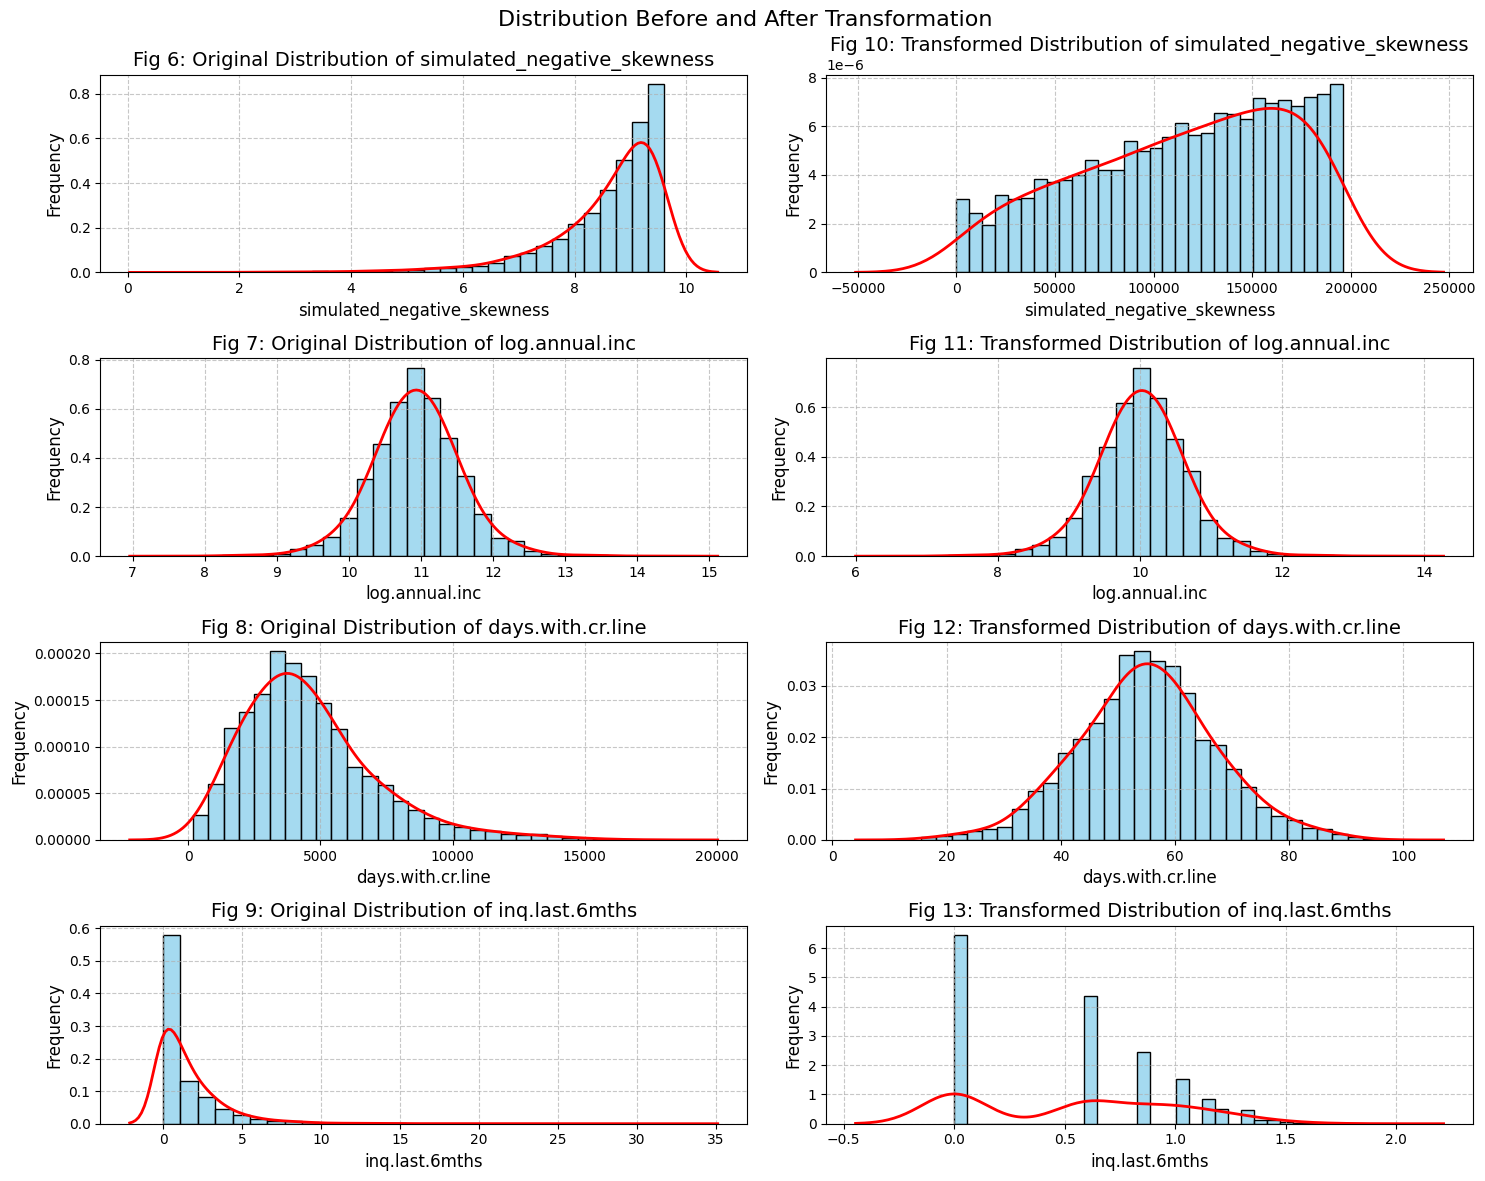

In [8]:
df_transformed = df.copy()
for feature in df.columns:
  if (df[feature] > 0).all():
    df_transformed[feature], _ = boxcox(df[feature])
  else:
    df_transformed[feature], _ = boxcox(df[feature] + 1)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(15, 3 * len(df.columns)))
fig.suptitle("Distribution Before and After Transformation", fontsize=16)
for i, feature in enumerate(df.columns):
  sns.histplot(df[feature], bins=30, color='skyblue', stat='density', ax=axes[i, 0])
  sns.kdeplot(df[feature], color='red', linewidth=2, bw_adjust=2, ax=axes[i, 0])
  axes[i, 0].set_xlabel(feature, fontsize=12)
  axes[i, 0].set_ylabel('Frequency', fontsize=12)
  axes[i, 0].set_title(f'Fig {i+6}: Original Distribution of {feature}', fontsize=14)
  axes[i, 0].grid(True, linestyle='--', alpha=0.7)
  sns.histplot(df_transformed[feature], bins=30, color='skyblue', stat='density', ax=axes[i, 1])
  sns.kdeplot(df_transformed[feature], color='red', linewidth=2, bw_adjust=2, ax=axes[i, 1])
  axes[i, 1].set_xlabel(feature, fontsize=12)
  axes[i, 1].set_ylabel('Frequency', fontsize=12)
  axes[i, 1].set_title(f'Fig {i+10}: Transformed Distribution of {feature}', fontsize=14)
  axes[i, 1].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

These graph for before and after transformation shows that when we address skewness the distribution is transformed to be near normal distribution

# **8.References**

1. https://www.kaggle.com/code/matinmahmoudi/loan-eda-project-quick-start-for-beginners/input
2. https://en.wikipedia.org/wiki/Skewness
3. https://koshurai.medium.com/understanding-skewness-a-statistical-concept-with-real-world-applications-bfb64c2e4c36
4. https://www.investopedia.com/terms/s/skewness.asp